# Exploratory Data Analysis (EDA) - Schweizer Wanderwege

Dieses Notebook führt eine umfassende explorative Datenanalyse der Schweizer Wanderwege durch.

**Ziele:**
- Non-graphical EDA: Deskriptive Statistiken, Häufigkeiten, Korrelationen
- Graphical EDA: 8 Visualisierungen zur Datenexploration
- Identifikation von Mustern und Zusammenhängen für Modellierung

## 1. Setup & Daten laden

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import utility functions for cleaner code
from db_utils import read_from_db, setup_display_settings, setup_visualization_settings

# Setup display and visualization settings
setup_display_settings(float_format='{:.2f}', precision=2)
setup_visualization_settings()


✅ Display settings configured
✅ Visualization settings configured


In [2]:
# Load data from MySQL database using utility function
df = read_from_db("SELECT * FROM wanderwege")

# Display first rows
df.head()

✅ Loaded 375 rows, 13 columns from database


,url,title,location,canton,difficulty_level,difficulty_num,duration_min,distance_km,ascent_m,descent_m,physical_demand,latitude,longitude
0,https://www.schweizer-wanderwege.ch/de/wanderv...,Husky-Traum,Muotathal,None,None,NaN,NaN,0.00,NaN,NaN,hoch,46.97,8.77
1,https://www.schweizer-wanderwege.ch/de/wanderv...,Aufregende Ausblicke auf dem Hochalp Trail,"Urnäsch, Anker",AR,None,NaN,405.00,11.40,720.00,720.00,hoch,47.31,9.28
2,https://www.schweizer-wanderwege.ch/de/wanderv...,Den ganzen Tag im Schnee,"Atzmännig SSA — Atzmännig, Schutt",SG,None,NaN,100.00,4.20,140.00,510.00,mittel,NaN,NaN
3,https://www.schweizer-wanderwege.ch/de/wanderv...,Panorama Trail in Obwalden,Langis,OW,None,NaN,270.00,12.30,565.00,565.00,hoch,46.89,8.13
4,https://www.schweizer-wanderwege.ch/de/wanderv...,Schneeschuhwanderung auf den Chasseron,"Les Rasses, village",VD,None,NaN,260.00,10.00,450.00,450.00,hoch,46.83,6.55


## 2. Non-Graphical EDA

### 2.1 Deskriptive Statistiken für numerische Variablen

In [3]:
# Deskriptive Statistiken für alle numerischen Variablen
numeric_cols = ['duration_min', 'distance_km', 'ascent_m', 'descent_m']

print("="*80)
print("DESKRIPTIVE STATISTIKEN - Numerische Variablen")
print("="*80)

desc_stats = df[numeric_cols].describe().T
desc_stats['median'] = df[numeric_cols].median()
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', 'max']]

print(desc_stats)
print("\n")

# Interpretation
print("INTERPRETATION:")
print(f"• Durchschnittliche Wanderdauer: {df['duration_min'].mean():.0f} Minuten ({df['duration_min'].mean()/60:.1f} Stunden)")
print(f"• Durchschnittliche Distanz: {df['distance_km'].mean():.1f} km")
print(f"• Durchschnittlicher Aufstieg: {df['ascent_m'].mean():.0f} m")
print(f"• Durchschnittlicher Abstieg: {df['descent_m'].mean():.0f} m")

DESKRIPTIVE STATISTIKEN - Numerische Variablen
              count   mean  median    std   min     max
duration_min 372.00 182.18  175.00  75.10 35.00  435.00
distance_km  375.00   8.72    8.40   3.73  0.00   24.30
ascent_m     373.00 314.03  290.00 187.99  0.00 1080.00
descent_m    372.00 351.10  315.00 221.82  5.00 1310.00


INTERPRETATION:
• Durchschnittliche Wanderdauer: 182 Minuten (3.0 Stunden)
• Durchschnittliche Distanz: 8.7 km
• Durchschnittlicher Aufstieg: 314 m
• Durchschnittlicher Abstieg: 351 m


### 2.2 Top 5 Kantone mit den meisten Wanderwegen

In [4]:
print("="*80)
print("HÄUFIGKEITSVERTEILUNG - Top 5 Kantone")
print("="*80)

canton_counts = df['canton'].value_counts().head(5)
canton_percentage = (canton_counts / len(df) * 100).round(1)

canton_df = pd.DataFrame({
    'Anzahl Wanderwege': canton_counts,
    'Prozent (%)': canton_percentage
})

print(canton_df)
print(f"\n Die Top 5 Kantone repräsentieren {canton_percentage.sum():.1f}% aller Wanderwege")

HÄUFIGKEITSVERTEILUNG - Top 5 Kantone
        Anzahl Wanderwege  Prozent (%)
canton                                
BE                     65        17.30
VS                     48        12.80
GR                     47        12.50
VD                     26         6.90
TI                     26         6.90

 Die Top 5 Kantone repräsentieren 56.4% aller Wanderwege


### 2.3 Korrelationsmatrix (numerische Variablen)

In [5]:
print("="*80)
print("KORRELATIONSMATRIX - Pearson Korrelation")
print("="*80)

correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(3))

print("\nINTERPRETATION:")
print("Werte nahe 1/-1 = starke Korrelation, nahe 0 = schwache Korrelation")

# Finde stärkste Korrelationen (ausser Diagonale)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

print("\nStärkste Korrelationen:")
for var1, var2, corr_val in corr_pairs_sorted[:3]:
    print(f"• {var1} ↔ {var2}: {corr_val:.3f}")

KORRELATIONSMATRIX - Pearson Korrelation
              duration_min  distance_km  ascent_m  descent_m
duration_min          1.00         0.78      0.74       0.70
distance_km           0.78         1.00      0.41       0.47
ascent_m              0.74         0.41      1.00       0.64
descent_m             0.70         0.47      0.64       1.00

INTERPRETATION:
Werte nahe 1/-1 = starke Korrelation, nahe 0 = schwache Korrelation

Stärkste Korrelationen:
• duration_min ↔ distance_km: 0.783
• duration_min ↔ ascent_m: 0.737
• duration_min ↔ descent_m: 0.697


### 2.4 Missing Values Check

In [6]:
print("="*80)
print("MISSING VALUES - Fehlende Werte pro Spalte")
print("="*80)

missing_data = pd.DataFrame({
    'Anzahl Missing': df.isnull().sum(),
    'Prozent (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Anzahl Missing'] > 0].sort_values('Anzahl Missing', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
    print(f"\nSpalten mit fehlenden Werten: {len(missing_data)}")
else:
    print("Keine fehlenden Werte gefunden!")

MISSING VALUES - Fehlende Werte pro Spalte
                  Anzahl Missing  Prozent (%)
difficulty_level             274        73.07
difficulty_num               274        73.07
latitude                      33         8.80
longitude                     33         8.80
duration_min                   3         0.80
canton                         3         0.80
descent_m                      3         0.80
ascent_m                       2         0.53

Spalten mit fehlenden Werten: 8


### 2.5 Crosstab: Schwierigkeitsgrad × Physische Anforderung

In [7]:
print("="*80)
print("CROSSTAB - Schwierigkeitsgrad vs. Physische Anforderung")
print("="*80)

# Make a safe version of difficulty_level for crosstabs/plots
# (in the DB NULL may become NaN; treat both as missing)

def ordered_difficulty_levels(series):
    """Return a sorted list of difficulty levels (e.g. ['T1','T2',...])
    excluding None/NaN. Sorting is numeric by the number after 'T'."""
    import re
    vals = [v for v in pd.unique(series) if pd.notna(v) and v is not None]
    # cast to str (safety), keep only T<number> patterns
    def sort_key(s):
        m = re.match(r"^T(\d+)$", str(s))
        return int(m.group(1)) if m else 999
    vals = list(map(str, vals))
    return sorted(vals, key=sort_key)

crosstab = pd.crosstab(df['difficulty_level'], df['physical_demand'], margins=True)
print(crosstab)

print("\nProzentuale Verteilung (zeilenweise):")
crosstab_pct = pd.crosstab(df['difficulty_level'], df['physical_demand'], normalize='index') * 100
print(crosstab_pct.round(1))

CROSSTAB - Schwierigkeitsgrad vs. Physische Anforderung
physical_demand   hoch  mittel  tief  All
difficulty_level                         
T1                   4      56    30   90
T2                   2       7     1   10
T3                   0       1     0    1
All                  6      64    31  101

Prozentuale Verteilung (zeilenweise):
physical_demand   hoch  mittel  tief
difficulty_level                    
T1                4.40   62.20 33.30
T2               20.00   70.00 10.00
T3                0.00  100.00  0.00


## 3. Graphical EDA

### 3.1 Histogramm: Verteilung der Wanderdauer

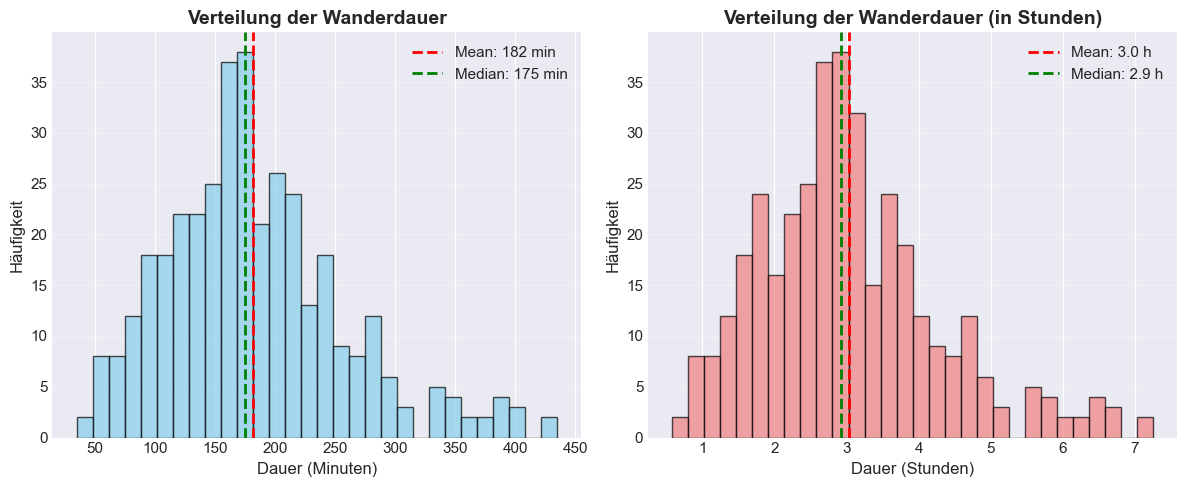

INTERPRETATION:
Die meisten Wanderungen dauern zwischen 2.2 und 3.7 Stunden.


In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['duration_min'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["duration_min"].mean():.0f} min')
plt.axvline(df['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["duration_min"].median():.0f} min')
plt.xlabel('Dauer (Minuten)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title('Verteilung der Wanderdauer', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['duration_min']/60, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(df['duration_min'].mean()/60, color='red', linestyle='--', linewidth=2, label=f'Mean: {df["duration_min"].mean()/60:.1f} h')
plt.axvline(df['duration_min'].median()/60, color='green', linestyle='--', linewidth=2, label=f'Median: {df["duration_min"].median()/60:.1f} h')
plt.xlabel('Dauer (Stunden)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title('Verteilung der Wanderdauer (in Stunden)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print(f"Die meisten Wanderungen dauern zwischen {df['duration_min'].quantile(0.25)/60:.1f} und {df['duration_min'].quantile(0.75)/60:.1f} Stunden.")

### 3.2 Boxplot: Distanz nach Schwierigkeitsgrad

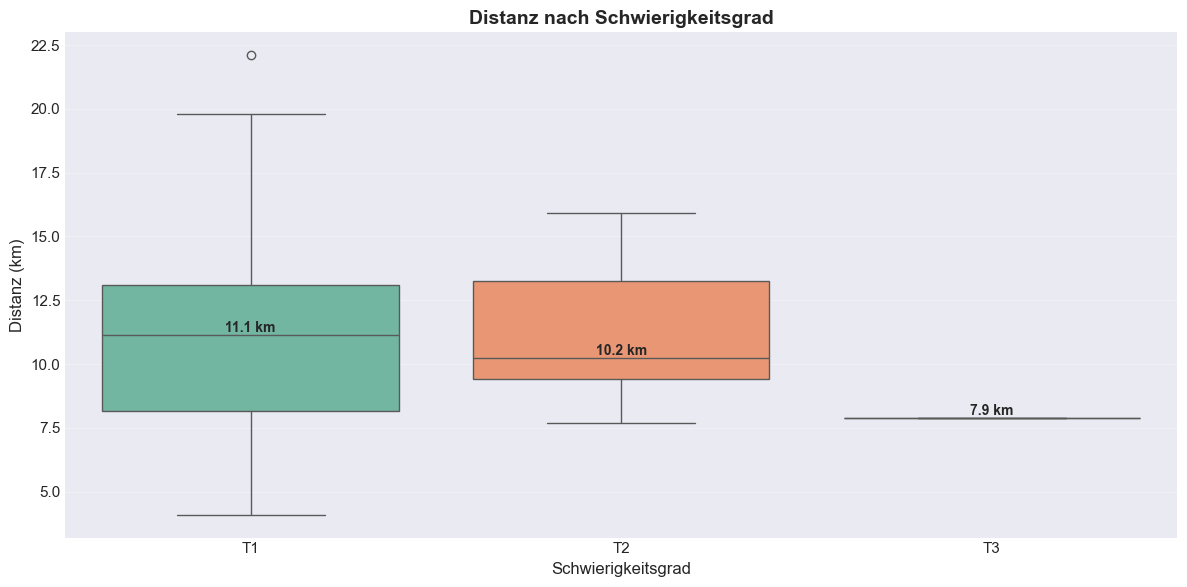

INTERPRETATION:
Die Box zeigt das mittlere 50% der Daten (25%-75% Quartil).
Ausreisser (Punkte) zeigen ungewöhnlich lange/kurze Routen für den jeweiligen Schwierigkeitsgrad.


In [9]:
plt.figure(figsize=(12, 6))

# Sortiere difficulty_level (sicher, ohne None/NaN)
difficulty_order = ordered_difficulty_levels(df['difficulty_level'])

# Optional: set categorical dtype so seaborn respects order consistently
if difficulty_order:
    df['difficulty_level'] = pd.Categorical(df['difficulty_level'],
                                            categories=difficulty_order,
                                            ordered=True)

sns.boxplot(data=df, x='difficulty_level', y='distance_km', order=difficulty_order, palette='Set2')
plt.xlabel('Schwierigkeitsgrad', fontsize=12)
plt.ylabel('Distanz (km)', fontsize=12)
plt.title('Distanz nach Schwierigkeitsgrad', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Füge Median-Werte hinzu
medians = df.groupby('difficulty_level')['distance_km'].median().reindex(difficulty_order)
for i, (level, median) in enumerate(medians.items()):
    # median kann NaN sein, überspringe dann
    if pd.isna(median):
        continue
    plt.text(i, median, f'{median:.1f} km', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print("Die Box zeigt das mittlere 50% der Daten (25%-75% Quartil).")
print("Ausreisser (Punkte) zeigen ungewöhnlich lange/kurze Routen für den jeweiligen Schwierigkeitsgrad.")

### 3.3 Scatterplot: Distanz vs. Dauer (mit Schwierigkeitsgrad)

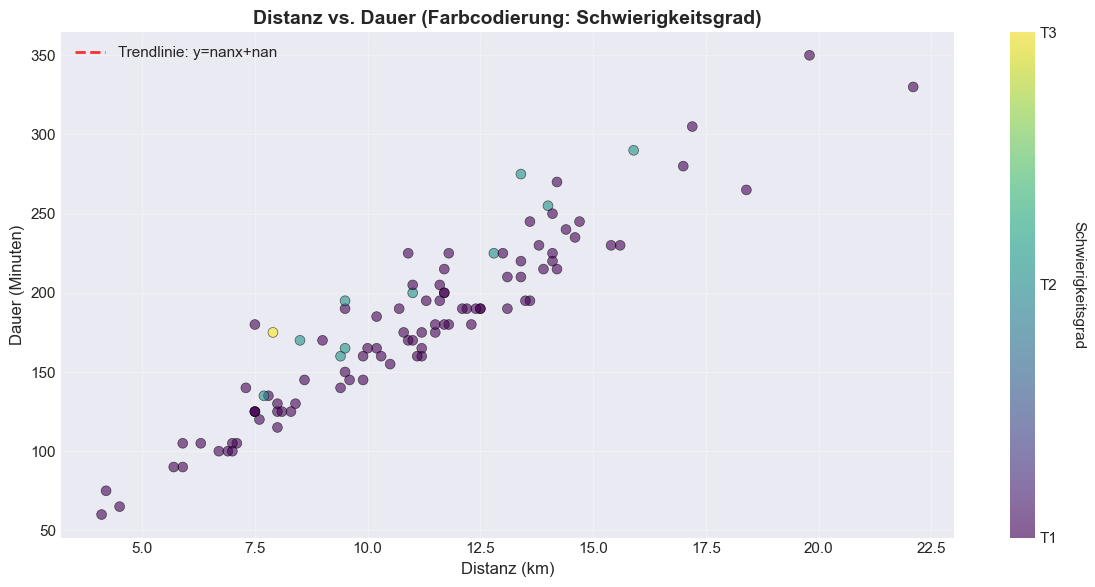

INTERPRETATION:
Korrelation Distanz ↔ Dauer: 0.783
Positive Korrelation bedeutet: Längere Distanzen benötigen tendenziell mehr Zeit.


In [10]:
plt.figure(figsize=(12, 6))

# Erstelle Scatterplot mit Farbcodierung nach Schwierigkeitsgrad
difficulty_order = ordered_difficulty_levels(df['difficulty_level'])
# build color map only for existing levels
difficulty_colors = {level: i for i, level in enumerate(difficulty_order)}
colors = df['difficulty_level'].map(difficulty_colors)

scatter = plt.scatter(df['distance_km'], df['duration_min'], c=colors, cmap='viridis',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.xlabel('Distanz (km)', fontsize=12)
plt.ylabel('Dauer (Minuten)', fontsize=12)
plt.title('Distanz vs. Dauer (Farbcodierung: Schwierigkeitsgrad)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Colorbar mit Labels (only if there is at least one level)
if difficulty_order:
    cbar = plt.colorbar(scatter, ticks=list(difficulty_colors.values()))
    cbar.ax.set_yticklabels(list(difficulty_colors.keys()))
    cbar.set_label('Schwierigkeitsgrad', rotation=270, labelpad=20, fontsize=11)

# Trendlinie hinzufügen
z = np.polyfit(df['distance_km'].dropna(), df.loc[df['distance_km'].notna(), 'duration_min'], 1)
p = np.poly1d(z)
plt.plot(df['distance_km'].sort_values(), p(df['distance_km'].sort_values()),
         "r--", linewidth=2, alpha=0.8, label=f'Trendlinie: y={z[0]:.1f}x+{z[1]:.1f}')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print(f"Korrelation Distanz ↔ Dauer: {df[['distance_km', 'duration_min']].corr().iloc[0,1]:.3f}")
print("Positive Korrelation bedeutet: Längere Distanzen benötigen tendenziell mehr Zeit.")

### 3.4 Korrelations-Heatmap

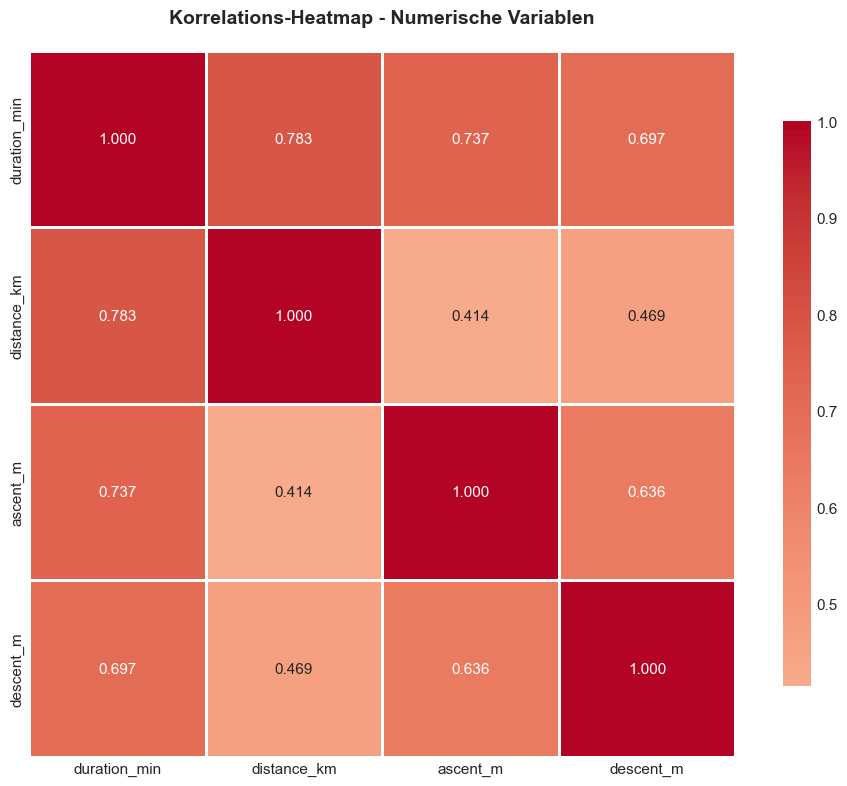

INTERPRETATION:
Rot = positive Korrelation, Blau = negative Korrelation
Werte nahe ±1 zeigen starke lineare Zusammenhänge.


In [11]:
plt.figure(figsize=(10, 8))

correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Korrelations-Heatmap - Numerische Variablen', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print("Rot = positive Korrelation, Blau = negative Korrelation")
print("Werte nahe ±1 zeigen starke lineare Zusammenhänge.")

### 3.5 Barplot: Top 5 Kantone nach Anzahl Wanderwege

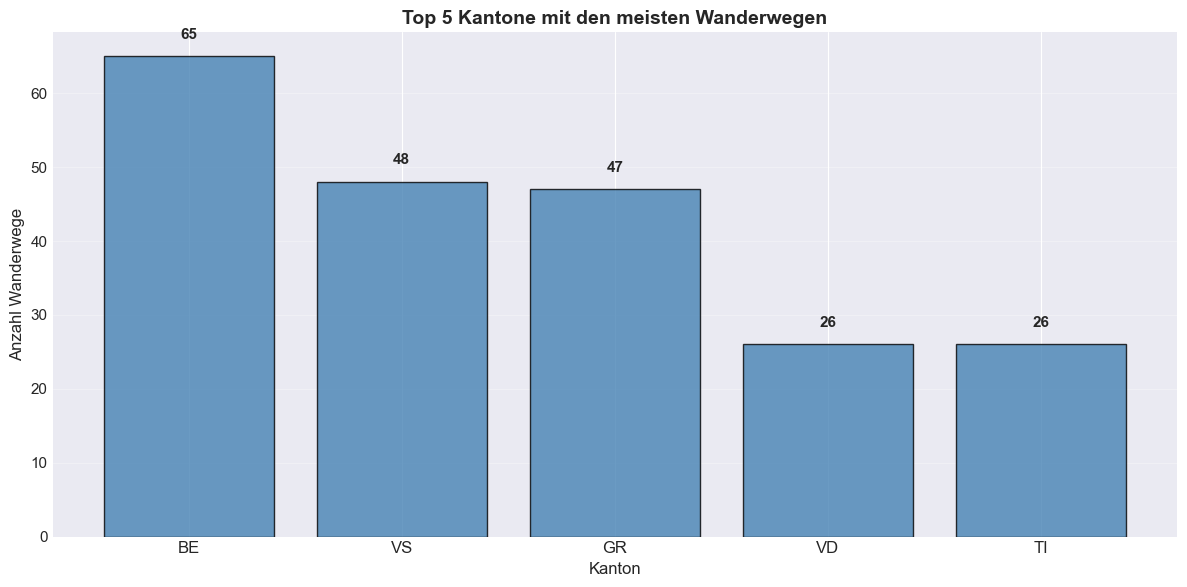

INTERPRETATION:
Der Kanton BE führt mit 65 Wanderwegen.


In [12]:
plt.figure(figsize=(12, 6))

top5_cantons = df['canton'].value_counts().head(5)

bars = plt.bar(range(len(top5_cantons)), top5_cantons.values,
               color='steelblue', edgecolor='black', alpha=0.8)

plt.xticks(range(len(top5_cantons)), top5_cantons.index, fontsize=12)
plt.xlabel('Kanton', fontsize=12)
plt.ylabel('Anzahl Wanderwege', fontsize=12)
plt.title('Top 5 Kantone mit den meisten Wanderwegen', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Werte auf Balken anzeigen
for i, (bar, value) in enumerate(zip(bars, top5_cantons.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print(f"Der Kanton {top5_cantons.index[0]} führt mit {top5_cantons.values[0]} Wanderwegen.")

### 3.6 Stacked Barplot: Schwierigkeitsgrad-Verteilung pro Kanton (Top 5)

<Figure size 1200x600 with 0 Axes>

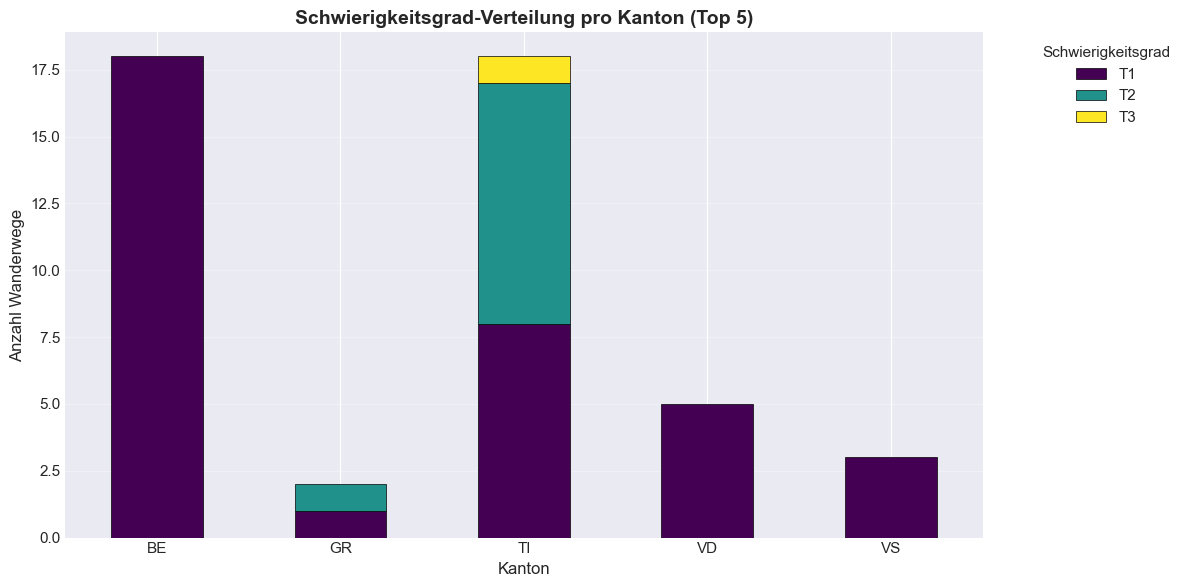

INTERPRETATION:
Zeigt die Verteilung der Schwierigkeitsgrade innerhalb der Top 5 Kantone.
Unterschiedliche Farben = unterschiedliche Schwierigkeitsgrade (T1-T6).


In [13]:
# Wähle Top 5 Kantone
top5_cantons = df['canton'].value_counts().head(5).index
df_top5 = df[df['canton'].isin(top5_cantons)]

# Erstelle Crosstab für Stacked Bar
crosstab_difficulty = pd.crosstab(df_top5['canton'], df_top5['difficulty_level'])

# Sortiere Schwierigkeitsgrade (ohne None/NaN)
difficulty_cols = [col for col in crosstab_difficulty.columns if pd.notna(col) and col is not None]
# use the ordered helper to determine final order
ordered_levels = ordered_difficulty_levels(difficulty_cols)
if ordered_levels:
    crosstab_difficulty = crosstab_difficulty[ordered_levels]

plt.figure(figsize=(12, 6))

crosstab_difficulty.plot(kind='bar', stacked=True, figsize=(12, 6),
                         colormap='viridis', edgecolor='black', linewidth=0.5)

plt.xlabel('Kanton', fontsize=12)
plt.ylabel('Anzahl Wanderwege', fontsize=12)
plt.title('Schwierigkeitsgrad-Verteilung pro Kanton (Top 5)', fontsize=14, fontweight='bold')
plt.legend(title='Schwierigkeitsgrad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print("Zeigt die Verteilung der Schwierigkeitsgrade innerhalb der Top 5 Kantone.")
print("Unterschiedliche Farben = unterschiedliche Schwierigkeitsgrade (T1-T6).")

## 4. Zusammenfassung der EDA-Erkenntnisse

In [14]:
print("="*80)
print("ZUSAMMENFASSUNG - Wichtigste Erkenntnisse aus der EDA")
print("="*80)
print()
print("DATENÜBERSICHT:")
print(f"   • Anzahl Wanderwege: {len(df)}")
print(f"   • Anzahl Kantone: {df['canton'].nunique()}")
print(f"   • Schwierigkeitsgrade: {ordered_difficulty_levels(df['difficulty_level'])}")
print()
print("NUMERISCHE ZUSAMMENHÄNGE:")
print(f"   • Stärkste Korrelation: {corr_pairs_sorted[0][0]} ↔ {corr_pairs_sorted[0][1]} ({corr_pairs_sorted[0][2]:.3f})")
print(f"   • Durchschnittliche Wanderzeit: {df['duration_min'].mean()/60:.1f} Stunden")
print(f"   • Durchschnittliche Distanz: {df['distance_km'].mean():.1f} km")
print()
print("HÖHENPROFILE:")
print(f"   • Durchschnittlicher Aufstieg: {df['ascent_m'].mean():.0f} m")
print(f"   • Max. Aufstieg: {df['ascent_m'].max():.0f} m")
print(f"   • Korrelation Aufstieg ↔ Abstieg: {df[['ascent_m', 'descent_m']].corr().iloc[0,1]:.3f}")
print()
print("GEOGRAPHISCHE VERTEILUNG:")
print(f"   • Top 5 Kantone: {', '.join(top5_cantons.tolist())}")
print(f"   • Führender Kanton: {top5_cantons[0]} ({canton_counts.iloc[0]} Wanderwege)")
print()
print("EDA abgeschlossen - Bereit für Modellierung!")
print("="*80)

ZUSAMMENFASSUNG - Wichtigste Erkenntnisse aus der EDA

DATENÜBERSICHT:
   • Anzahl Wanderwege: 375
   • Anzahl Kantone: 26
   • Schwierigkeitsgrade: ['T1', 'T2', 'T3']

NUMERISCHE ZUSAMMENHÄNGE:
   • Stärkste Korrelation: duration_min ↔ distance_km (0.783)
   • Durchschnittliche Wanderzeit: 3.0 Stunden
   • Durchschnittliche Distanz: 8.7 km

HÖHENPROFILE:
   • Durchschnittlicher Aufstieg: 314 m
   • Max. Aufstieg: 1080 m
   • Korrelation Aufstieg ↔ Abstieg: 0.636

GEOGRAPHISCHE VERTEILUNG:
   • Top 5 Kantone: BE, VS, GR, VD, TI
   • Führender Kanton: BE (65 Wanderwege)

EDA abgeschlossen - Bereit für Modellierung!


### Jupyter notebook --footer info--

In [15]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')


-----------------------------------
NT
Windows | 11
Datetime: 2026-01-03 11:11:19
Python Version: 3.14.0
-----------------------------------
